<a href="https://colab.research.google.com/github/malacosteus/DLS/blob/main/wrapped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install tensorflow==2.8.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install openbabel_wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from openbabel import pybel #as pb
from openbabel import openbabel #as ob

In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import rdkit
import csv

In [21]:
file = '/content/pos/c2000.99992000.pos'

In [22]:
from itertools import islice

In [23]:
with open(file) as fin:
     for i, line in enumerate(fin):
        if i == 5:
            xlo, xhi = [float(i) for i in line.strip().split(' ')]
        elif i == 6:
            ylo, yhi = [float(i) for i in line.strip().split(' ')]
        elif i == 7:
            zlo, zhi = [float(i) for i in line.strip().split(' ')]
        elif i > 8:
            break
fin.close()

In [24]:
dct = {}
id = []
atype = []
x = []
y = []
z = []
cluster = []
with open(file) as fin:
      for line in islice(fin, 9, None):
        data = line.strip().split(' ')
        id.append(int(data[0]))
        t = data[1]
        if t == '1':
          atype.append('C')
        else: atype.append('H')
        x.append(float(data[2]))
        y.append(float(data[3]))
        z.append(float(data[4]))
        cluster.append(int(data[5]))
fin.close()
dct['id'] = id
dct['type'] = atype
dct['x'] = x
dct['y'] = y
dct['z'] = z
dct['cluster'] = cluster

In [25]:
df =pd.DataFrame.from_dict(dct)
type(df)

pandas.core.frame.DataFrame

In [26]:
#df['xyz'] = df['type'] + ' ' + df['x'].astype(str) + ' ' + df['y'].astype(str)+ ' ' + df['z'].astype(str)

In [27]:
clusters = df['cluster'].unique()

In [28]:
clusters

array([  9, 359, 560,   1,  56, 264, 139,  44,  91, 128, 536,  24, 309,
        20, 260,  10, 142,  22,  59,  60,  64, 147,  23, 116,  40,   3,
       487, 280,  72, 203,  45, 184,   6, 228, 179, 288,  48,  13, 131,
       176,  63,  15, 267, 572, 375, 300, 171, 604, 587, 120,  35, 138,
       312, 132, 488,  29,  66, 275, 191, 215, 243, 368, 304, 195, 104,
        71, 164, 140, 123, 491, 371,  84, 155,  14,  21, 270,   8,  58,
       616, 440, 623, 320, 165,  31, 512, 211, 547, 252, 311,  96,  12,
       379,  83])

In [15]:
#!gunzip /content/drive/MyDrive/acetylene/pos.tar.gz
!tar xvf /content/drive/MyDrive/acetylene/pos.tar

pos/
pos/pos.tar
pos/pos.tar.gz
pos/c2000.99998000.pos
pos/c2000.99990000.pos
pos/c2000.99992000.pos
pos/c2000.99996000.pos
pos/c2000.99994000.pos


In [29]:
from os import listdir
from os.path import isfile, join

In [30]:
import os

In [18]:
path = '/content/drive/MyDrive/gif/'
files = os.listdir(path)

for index, file in enumerate(files):
  os.rename(os.path.join(path, file), os.path.join(path, ''.join(['frame-', str(index), '.png'])))

In [ ]:
#!zip -r '/content/drive/MyDrive/gif/gif_new.zip' '/content/drive/MyDrive/gif/'

In [ ]:
#!unzip /content/drive/MyDrive/gif/gif.zip -d /content/drive/MyDrive/gif/

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = [f for f in listdir('/content/pos/') if isfile(join('/content/pos/', f))]
files

['c2000.99992000.pos',
 'c2000.99998000.pos',
 'c2000.99994000.pos',
 'c2000.99990000.pos',
 'c2000.99996000.pos']

In [129]:
files = ['c2000.99992000.pos',
 'c2000.99994000.pos',
 'c2000.99996000.pos',
 'c2000.99998000.pos',
 'c2000.99990000.pos']

In [ ]:
#!rm -r -f /content/drive/MyDrive/acetylene/pos/

In [130]:
def processing(file:str) -> pd.DataFrame:  
      with open('/content/pos/'+file) as fin:
        for i, line in enumerate(fin):
          if i == 5:
              xlo, xhi = [float(i) for i in line.strip().split(' ')]
          elif i == 6:
              ylo, yhi = [float(i) for i in line.strip().split(' ')]
          elif i == 7:
              zlo, zhi = [float(i) for i in line.strip().split(' ')]
          elif i > 8:
              break
      fin.close()
      dct = {}
      id = []
      atype = []
      x = []
      y = []
      z = []
      cluster = []
      with open('/content/pos/'+file) as fin:
       for line in islice(fin, 9, None):
          data = line.strip().split(' ')
          id.append(int(data[0]))
          t = data[1]
          if t == '1':
            atype.append('C')
          else: atype.append('H')
          x.append(float(data[2]))
          y.append(float(data[3]))
          z.append(float(data[4]))
          cluster.append(int(data[5]))
      fin.close()
      dct['id'] = id
      dct['type'] = atype
      dct['x'] = x
      dct['y'] = y
      dct['z'] = z
      dct['cluster'] = cluster
      df =pd.DataFrame.from_dict(dct)
      clusters = df['cluster'].unique()
      xyz_file_names = []
      for cluster in clusters:
        coords_full = get_coords_full(df, cluster)
        unwrap_outlying_coord(df, coords_full, zhi, zlo)
        '''x_coords = get_coords_list(df, 'x', cluster)
        y_coords = get_coords_list(df, 'y', cluster)
        z_coords = get_coords_list(df, 'z', cluster)
        change_outliers3(df, x_coords, xlo, xhi)
        change_outliers3(df, y_coords, ylo, yhi)
        change_outliers3(df, z_coords, zlo, zhi)'''
      df['xyz'] = df['type'] + ' ' + df['x'].astype(str) + ' ' + df['y'].astype(str)+ ' ' + df['z'].astype(str)
      print(df.head(20))
      duplicates = df.pivot_table(index = ['cluster'], aggfunc ='size', sort=False)
      duplicates = duplicates.to_frame(name='num').reset_index()
      print(duplicates.head())
      df_new = df[['cluster', 'xyz']].copy()
      df_new = df_new.groupby('cluster', sort=False)['xyz'].apply('\n'.join)
      df_new = df_new.to_frame().reset_index()
      df_new['xyz'] = duplicates['num'].astype(str) + '\n' + '\n' + df_new['xyz']
      
      print(df_new.head(11))
      #df_new.to_csv('/content/drive/MyDrive/acetylene/pos/'+file+'.csv')
      for xyz, cluster in zip(df_new['xyz'].to_list(), df_new['cluster'].to_list()):
        xyz_file = open('/content/drive/MyDrive/acetylene/xyz/'+file[:-4]+'_'+str(cluster)+'.xyz','w')
        xyz_file.write(xyz)
        xyz_file.close()
        xyz_file_names.append('/content/drive/MyDrive/acetylene/xyz/'+file[:-4]+'_'+str(cluster)+'.xyz')
      df_new['file_names'] = xyz_file_names
      df_new.to_csv('/content/drive/MyDrive/acetylene/pos/'+file[:-4]+'.csv')
      #xyz_strings.extend(df_new['xyz'])
      return df_new


In [131]:
xyz_strings = []
df_list = []
for file in files:
    df = processing(file)
    df_list.append(df)
    xyz_string = (df['xyz'])
    xyz_strings.extend(xyz_string)
df_fin = pd.concat(df_list, ignore_index=True)
df_fin = df_fin.reset_index()
df_fin.head()

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 13.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 4.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 27.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 Th

     id type        x        y        z  cluster  \
0   441    C  28.1192  31.3869  30.3795        9   
1   317    C  28.6231  30.2413  31.0204        9   
2    43    H  27.9262  29.2705  31.1493        9   
3   291    H  29.0706  30.8017  31.9935        9   
4   727    H  28.8675  31.3821  33.6862        9   
5    75    H  28.0381  30.9775  33.6976        9   
6   664    H  37.4239  29.2873  32.0733      359   
7   511    H  37.7208  29.5512  28.9660      359   
8   478    C  37.5926  28.8774  31.1012      359   
9   359    H  38.1263  30.7076  30.6821      359   
10  592    H  37.2420  27.7922  30.9012      359   
11  642    C  37.8359  29.7581  30.0850      359   
12  596    H  42.7273  27.8157  31.7577      560   
13  560    H  42.4459  28.4790  32.0436      560   
14  652    H  52.1782  30.9589  72.1766        1   
15  685    C  52.2687  31.4991  71.1939        1   
16  638    C  51.6593  31.2240  69.8545        1   
17   36    H  27.6244  32.8681  28.6966        9   
18    9    C

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


     id type        x        y        z  cluster  \
0   441    C  27.4241  31.8864  31.0421        9   
1   317    C  28.0754  31.3190  32.0297        9   
2    43    H  27.5888  30.3850  32.6555        9   
3   291    H  29.2750  31.6308  32.0286        9   
4   511    H  37.6787  29.7977  32.8958      359   
5   478    C  38.8228  30.9572  31.5402      359   
6   359    H  39.0995  30.4573  33.6847      359   
7   592    H  38.0664  31.0160  30.6933      359   
8   642    C  38.7161  30.2462  32.7500      359   
9   664    H  39.6821  31.4964  31.3694      359   
10  652    H  51.6386  31.6202  73.1273        1   
11  685    C  52.1848  31.6415  72.1634        1   
12  638    C  52.2862  31.0118  70.8073        1   
13  340    H  51.5459  30.4959  70.4127        1   
14   36    H  27.7766  32.5384  29.1295        9   
15    9    C  26.8989  34.1586  30.3210        9   
16   41    C  27.0910  32.7107  29.8985        9   
17  722    C  27.6279  35.0498  29.3742        9   
18  714    C

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 5.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected comp

     id type        x        y        z  cluster  \
0   441    C  26.6838  31.7985  30.8288        9   
1   576    H  29.6042  32.2069  27.4103       56   
2   552    H  31.2352  32.2000  28.5221       56   
3   638    C  52.7354  31.5520  72.0610        1   
4   340    H  51.6515  31.1422  72.1837        1   
5   451    H  50.6339  30.9428  70.6747        1   
6   373    C  53.1498  32.0514  70.7217        1   
7   685    C  53.0349  32.0265  73.3363        1   
8   751    H  29.4833  35.6830  30.6463      587   
9   587    H  30.0118  35.2031  30.2410      587   
10   36    H  27.5459  32.4322  28.9361        9   
11    9    C  27.9281  34.0149  29.7898        9   
12   41    C  27.5023  32.5248  29.8943        9   
13  722    C  27.6843  34.6119  28.7489        9   
14  714    C  27.4562  35.4661  27.6629        9   
15  192    H  26.8892  35.3701  26.6507        9   
16  543    H  28.2460  36.2027  27.5476        9   
17  367    H  30.2526  33.5246  28.0755       56   
18  245    C

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 6.
  warnings.warn(message)


     id type        x        y        z  cluster  \
0   576    H  28.2355  30.3485  27.2926       56   
1   367    H  29.9771  30.5445  27.1560       56   
2   245    C  29.1989  30.4414  27.8777       56   
3    56    H  29.2451  29.3450  28.1399       56   
4   552    H  29.2134  30.8342  28.7504       56   
5   291    H  26.6576  30.9908  31.4565        9   
6   699    H  34.0006  27.1349  29.2372      488   
7   488    H  34.7444  26.7641  29.0445      488   
8   638    C  52.9778  31.3774  71.9595        1   
9   340    H  52.2147  30.6117  71.8945        1   
10  451    H  51.1579  29.6955  71.0000        1   
11  767    H  48.6817  30.4024  69.9422        1   
12  652    H  52.9380  31.5055  74.2184        1   
13  473    C  50.9218  30.2256  69.8684        1   
14  685    C  53.1828  31.9593  73.2676        1   
15    9    C  26.5756  33.6283  29.3818        9   
16  722    C  27.4237  34.2103  28.5143        9   
17  714    C  28.2014  34.7366  27.7764        9   
18  192    H

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 11.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 4.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 6.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 The

     id type        x        y        z  cluster                        xyz
0   441    C  28.7716  31.1176  29.2080        9   C 28.7716 31.1176 29.208
1   317    C  29.6836  30.3092  28.5958        9  C 29.6836 30.3092 28.5958
2    43    H  29.5223  29.2416  28.5123        9  H 29.5223 29.2416 28.5123
3   291    H  30.5616  30.5840  28.0408        9   H 30.5616 30.584 28.0408
4   664    H  36.9148  28.3248  27.6122      359  H 36.9148 28.3248 27.6122
5   511    H  37.4647  26.8428  29.5358      359  H 37.4647 26.8428 29.5358
6   478    C  36.4672  28.4659  28.5553      359  C 36.4672 28.4659 28.5553
7   359    H  36.7534  27.6906  30.6639      359  H 36.7534 27.6906 30.6639
8   592    H  35.7670  29.2190  28.5595      359    H 35.767 29.219 28.5595
9   642    C  36.8750  27.6216  29.5790      359    C 36.875 27.6216 29.579
10   36    H  27.8109  31.9561  31.2162        9  H 27.8109 31.9561 31.2162
11    9    C  28.5312  33.6205  30.3607        9  C 28.5312 33.6205 30.3607
12   41    C

,index,cluster,xyz,file_names
0,0,9,14\n\nC 28.1192 31.3869 30.3795\nC 28.6231 30....,/content/drive/MyDrive/acetylene/xyz/c2000.999...
1,1,359,6\n\nH 37.4239 29.2873 32.0733\nH 37.7208 29.5...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
2,2,560,2\n\nH 42.7273 27.8157 31.7577\nH 42.4459 28.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
3,3,1,147\n\nH 52.1782 30.9589 72.1766\nC 52.2687 31...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
4,4,56,5\n\nH 34.8405 36.0883 26.9255\nH 33.4974 34.7...,/content/drive/MyDrive/acetylene/xyz/c2000.999...


In [132]:
df_fin.to_csv('/content/drive/MyDrive/acetylene/pos/fin_df.csv')#RESET_INDEX()!!!!!!!

In [133]:
df_fin.head(120)

,index,cluster,xyz,file_names
0,0,9,14\n\nC 28.1192 31.3869 30.3795\nC 28.6231 30....,/content/drive/MyDrive/acetylene/xyz/c2000.999...
1,1,359,6\n\nH 37.4239 29.2873 32.0733\nH 37.7208 29.5...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
2,2,560,2\n\nH 42.7273 27.8157 31.7577\nH 42.4459 28.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
3,3,1,147\n\nH 52.1782 30.9589 72.1766\nC 52.2687 31...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
4,4,56,5\n\nH 34.8405 36.0883 26.9255\nH 33.4974 34.7...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
...,...,...,...,...
115,115,158,11\n\nC 45.9201 43.2986 49.3399\nH 43.4354 45....,/content/drive/MyDrive/acetylene/xyz/c2000.999...
116,116,147,4\n\nH 40.7957 44.0579 50.5683\nC 41.0495 44.2...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
117,117,312,2\n\nH 47.0918 28.7522 60.7055\nH 47.4724 29.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
118,118,560,2\n\nH 39.7267 36.7975 64.1362\nH 40.2474 37.1...,/content/drive/MyDrive/acetylene/xyz/c2000.999...


In [134]:
len(xyz_strings)

469

In [ ]:
xyz_strings[0]

'2\n\nH 37.242 27.7922 30.9012\nC 37.8359 29.7581 30.085'

In [135]:
structures = [pybel.readstring('xyz', x) for x in xyz_strings]

In [136]:
len(structures)

469

In [ ]:
def get_coords_list(df: pd.DataFrame, coord: str, cluster: int) -> list[tuple]:
  coords = df.loc[df['cluster'] == cluster, coord].to_list()
  coords = [(i, j) for i, j in zip(range(len(coords)), coords)]
  coords.sort(key=lambda x: x[1])
  return coords

In [127]:
def get_coords_list_uns(df: pd.DataFrame, coord: str, cluster: int) -> list[tuple]:
  coords = df.loc[df['cluster'] == cluster, coord].to_list()
  coords = [(i, j) for i, j in zip(range(len(coords)), coords)]
  return coords

In [100]:
z_mid = (zhi - zlo) /2
z_mid

22.044749999999997

In [101]:
z_coords = get_coords_list_uns(df,'z', 1)
y_coords = get_coords_list_uns(df,'y', 1)
x_coords = get_coords_list_uns(df,'x', 1)
z_coords

[(0, 28.0871),
 (1, 27.1044),
 (2, 25.765),
 (3, 29.3181),
 (4, 55.9256),
 (5, 56.7417),
 (6, 58.4962),
 (7, 56.8012),
 (8, 56.9545),
 (9, 58.2737),
 (10, 54.5678),
 (11, 56.0251),
 (12, 55.3365),
 (13, 55.7911),
 (14, 55.8822),
 (15, 55.8571),
 (16, 55.0371),
 (17, 64.7319),
 (18, 67.1226),
 (19, 67.7002),
 (20, 66.8236),
 (21, 66.4578),
 (22, 66.6589),
 (23, 64.8505),
 (24, 65.4055),
 (25, 64.6015),
 (26, 65.4031),
 (27, 68.772),
 (28, 67.453),
 (29, 66.4905),
 (30, 69.6343),
 (31, 63.3688),
 (32, 60.0165),
 (33, 65.2931),
 (34, 61.5736),
 (35, 63.8144),
 (36, 62.7878),
 (37, 62.6498),
 (38, 63.6682),
 (39, 61.6383),
 (40, 62.2416),
 (41, 60.298),
 (42, 60.1401),
 (43, 59.5038),
 (44, 60.86),
 (45, 59.6083),
 (46, 64.2714),
 (47, 62.9521),
 (48, 60.2518),
 (49, 58.8386),
 (50, 28.5355),
 (51, 28.6479),
 (52, 26.3049),
 (53, 27.3908),
 (54, 29.0151),
 (55, 29.8403),
 (56, 27.3215),
 (57, 28.7192),
 (58, 26.9634),
 (59, 28.3504),
 (60, 27.4685),
 (61, 28.7057),
 (62, 27.6348),
 (63, 28

In [102]:
coords_full = np.array([[x_coords[i][1], y_coords[i][1], z_coords[i][1]] for i in range(len(x_coords))])
coords_full

array([[52.1782, 30.9589, 28.0871],
       [52.2687, 31.4991, 27.1044],
       [51.6593, 31.224 , 25.765 ],
       [52.9484, 33.5043, 29.3181],
       [51.5238, 37.4767, 55.9256],
       [52.1697, 35.4538, 56.7417],
       [47.8865, 34.2953, 58.4962],
       [49.3193, 36.3338, 56.8012],
       [51.0784, 34.3279, 56.9545],
       [51.4675, 33.6975, 58.2737],
       [48.6272, 34.7468, 54.5678],
       [50.1313, 33.6929, 56.0251],
       [49.4252, 34.7851, 55.3365],
       [49.9788, 32.5565, 55.7911],
       [49.7749, 36.1405, 55.8822],
       [51.2963, 36.4635, 55.8571],
       [51.9583, 35.9193, 55.0371],
       [46.2381, 31.894 , 64.7319],
       [49.8887, 30.3499, 67.1226],
       [49.493 , 29.5496, 67.7002],
       [50.8402, 31.3461, 66.8236],
       [48.7305, 30.6004, 66.4578],
       [48.1123, 29.7018, 66.6589],
       [49.6548, 32.0611, 64.8505],
       [48.492 , 31.5263, 65.4055],
       [47.2992, 31.9045, 64.6015],
       [50.9861, 31.61  , 65.4031],
       [52.4006, 31.893 , 68

In [ ]:
!pip install networkx

In [ ]:
!pip install libpysal

In [38]:
from libpysal import weights, examples

/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [39]:
import networkx as nx

In [103]:
dist = weights.DistanceBand.from_array(coords_full, threshold=z_mid)

In [104]:
dist_graph = dist.to_networkx()

In [105]:
cc = nx.connected_components(dist_graph)

In [107]:
cc = list(cc)
len(cc)

2

In [108]:
cc[0]

{0,
 1,
 2,
 3,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78}

In [109]:
comp1 = []
for i in cc[0]:
  comp1.append(coords_full[i])

In [110]:
comp1

[array([52.1782, 30.9589, 28.0871]),
 array([52.2687, 31.4991, 27.1044]),
 array([51.6593, 31.224 , 25.765 ]),
 array([52.9484, 33.5043, 29.3181]),
 array([61.5399, 30.5256, 28.5355]),
 array([60.4787, 30.3199, 28.6479]),
 array([61.6218, 31.8507, 26.3049]),
 array([62.3392, 31.3407, 27.3908]),
 array([62.5994, 29.7214, 29.0151]),
 array([62.0797, 29.1247, 29.8403]),
 array([64.5711, 30.9631, 27.3215]),
 array([63.6188, 29.8509, 28.7192]),
 array([63.6717, 31.5946, 26.9634]),
 array([57.3802, 32.8953, 28.3504]),
 array([58.1771, 32.6105, 27.4685]),
 array([59.6764, 32.1733, 28.7057]),
 array([59.4235, 32.2022, 27.6348]),
 array([54.5693, 34.1622, 28.0807]),
 array([56.598 , 37.2574, 28.0866]),
 array([55.1645, 35.3975, 28.4543]),
 array([56.2491, 36.1893, 27.9524]),
 array([56.9346, 35.0602, 27.2313]),
 array([57.8926, 35.2934, 27.0417]),
 array([56.1771, 34.1522, 26.3861]),
 array([54.7347, 35.7971, 29.4633]),
 array([54.9622, 33.6709, 26.9275]),
 array([60.081 , 32.13  , 26.3937]),
 

In [111]:
comp2 = []
for i in cc[1]:
  comp2.append(coords_full[i])
comp2

[array([51.5238, 37.4767, 55.9256]),
 array([52.1697, 35.4538, 56.7417]),
 array([47.8865, 34.2953, 58.4962]),
 array([49.3193, 36.3338, 56.8012]),
 array([51.0784, 34.3279, 56.9545]),
 array([51.4675, 33.6975, 58.2737]),
 array([48.6272, 34.7468, 54.5678]),
 array([50.1313, 33.6929, 56.0251]),
 array([49.4252, 34.7851, 55.3365]),
 array([49.9788, 32.5565, 55.7911]),
 array([49.7749, 36.1405, 55.8822]),
 array([51.2963, 36.4635, 55.8571]),
 array([51.9583, 35.9193, 55.0371]),
 array([46.2381, 31.894 , 64.7319]),
 array([49.8887, 30.3499, 67.1226]),
 array([49.493 , 29.5496, 67.7002]),
 array([50.8402, 31.3461, 66.8236]),
 array([48.7305, 30.6004, 66.4578]),
 array([48.1123, 29.7018, 66.6589]),
 array([49.6548, 32.0611, 64.8505]),
 array([48.492 , 31.5263, 65.4055]),
 array([47.2992, 31.9045, 64.6015]),
 array([50.9861, 31.61  , 65.4031]),
 array([52.4006, 31.893 , 68.772 ]),
 array([52.0902, 31.7871, 67.453 ]),
 array([52.9681, 32.1032, 66.4905]),
 array([50.832 , 30.5015, 69.6343]),
 

In [112]:
len(comp1), len(comp2)

(33, 114)

In [113]:
#now we have to find the coordinate that differs that much
#maybe, by mean values?
means1 = np.mean(comp1, axis=0)
means1

array([57.77543939, 32.65462727, 27.69193939])

In [114]:
means2 = np.mean(comp2, axis=0)
means2

array([55.85974474, 32.99927018, 62.56354825])

In [115]:
def get_coords_full(df: pd.DataFrame, cluster:int) -> np.array:
  z_coords = get_coords_list_uns(df,'z', cluster)
  y_coords = get_coords_list_uns(df,'y', cluster)
  x_coords = get_coords_list_uns(df,'x', cluster)
  coords_full = np.array([[x_coords[i][1], y_coords[i][1], z_coords[i][1]] for i in range(len(x_coords))])
  return coords_full

In [118]:
components_coords = [[coords_full[j] for j in i] for i in cc]
components_coords

[[array([52.1782, 30.9589, 28.0871]),
  array([52.2687, 31.4991, 27.1044]),
  array([51.6593, 31.224 , 25.765 ]),
  array([52.9484, 33.5043, 29.3181]),
  array([61.5399, 30.5256, 28.5355]),
  array([60.4787, 30.3199, 28.6479]),
  array([61.6218, 31.8507, 26.3049]),
  array([62.3392, 31.3407, 27.3908]),
  array([62.5994, 29.7214, 29.0151]),
  array([62.0797, 29.1247, 29.8403]),
  array([64.5711, 30.9631, 27.3215]),
  array([63.6188, 29.8509, 28.7192]),
  array([63.6717, 31.5946, 26.9634]),
  array([57.3802, 32.8953, 28.3504]),
  array([58.1771, 32.6105, 27.4685]),
  array([59.6764, 32.1733, 28.7057]),
  array([59.4235, 32.2022, 27.6348]),
  array([54.5693, 34.1622, 28.0807]),
  array([56.598 , 37.2574, 28.0866]),
  array([55.1645, 35.3975, 28.4543]),
  array([56.2491, 36.1893, 27.9524]),
  array([56.9346, 35.0602, 27.2313]),
  array([57.8926, 35.2934, 27.0417]),
  array([56.1771, 34.1522, 26.3861]),
  array([54.7347, 35.7971, 29.4633]),
  array([54.9622, 33.6709, 26.9275]),
  array([60.

In [119]:
components_dct = dict(enumerate([(len(i), np.mean(i, axis=0)) for i in components_coords]))
components_dct

{0: (33, array([57.77543939, 32.65462727, 27.69193939])),
 1: (114, array([55.85974474, 32.99927018, 62.56354825]))}

In [120]:
components_srt = sorted(components_dct.items(), key=lambda x: x[1][0], reverse=True)
components_srt

[(1, (114, array([55.85974474, 32.99927018, 62.56354825]))),
 (0, (33, array([57.77543939, 32.65462727, 27.69193939])))]

In [121]:
components_coords_srt = sorted(components_coords, key= lambda x: len(x), reverse=True)
components_coords_srt

[[array([51.5238, 37.4767, 55.9256]),
  array([52.1697, 35.4538, 56.7417]),
  array([47.8865, 34.2953, 58.4962]),
  array([49.3193, 36.3338, 56.8012]),
  array([51.0784, 34.3279, 56.9545]),
  array([51.4675, 33.6975, 58.2737]),
  array([48.6272, 34.7468, 54.5678]),
  array([50.1313, 33.6929, 56.0251]),
  array([49.4252, 34.7851, 55.3365]),
  array([49.9788, 32.5565, 55.7911]),
  array([49.7749, 36.1405, 55.8822]),
  array([51.2963, 36.4635, 55.8571]),
  array([51.9583, 35.9193, 55.0371]),
  array([46.2381, 31.894 , 64.7319]),
  array([49.8887, 30.3499, 67.1226]),
  array([49.493 , 29.5496, 67.7002]),
  array([50.8402, 31.3461, 66.8236]),
  array([48.7305, 30.6004, 66.4578]),
  array([48.1123, 29.7018, 66.6589]),
  array([49.6548, 32.0611, 64.8505]),
  array([48.492 , 31.5263, 65.4055]),
  array([47.2992, 31.9045, 64.6015]),
  array([50.9861, 31.61  , 65.4031]),
  array([52.4006, 31.893 , 68.772 ]),
  array([52.0902, 31.7871, 67.453 ]),
  array([52.9681, 32.1032, 66.4905]),
  array([50.

In [122]:
diffs = [components_srt[0][1][1] - el[1][1] for el in components_srt]
diffs

[array([0., 0., 0.]), array([-1.91569466,  0.3446429 , 34.87160885])]

In [123]:
outliers = []
for i in range(len(diffs)):
      print(f'i={i}')
      for j in range(len(diffs[i])):
        print(f'j={j}')
        if abs(diffs[i][j]) > (zhi - zlo) / 2:
          print('yes')
          idx = j
          outliers = []
          if diffs[i][j] < 0:
            outliers.append((i,idx, lambda a, b: a - b))
          else:
            outliers.append((i,idx, lambda a, b: a + b))
outliers

i=0
j=0
j=1
j=2
i=1
j=0
j=1
j=2
yes


[(1, 2, <function __main__.<lambda>(a, b)>)]

In [124]:
for i in outliers:
  for j in components_coords_srt[i[0]]:
    #df.replace(j[i[1]], i[2](j[i[1]], (zhi-zlo)))
    j[i[1]] = i[2](j[i[1]], (zhi-zlo))

In [126]:
components_coords_srt

[[array([51.5238, 37.4767, 55.9256]),
  array([52.1697, 35.4538, 56.7417]),
  array([47.8865, 34.2953, 58.4962]),
  array([49.3193, 36.3338, 56.8012]),
  array([51.0784, 34.3279, 56.9545]),
  array([51.4675, 33.6975, 58.2737]),
  array([48.6272, 34.7468, 54.5678]),
  array([50.1313, 33.6929, 56.0251]),
  array([49.4252, 34.7851, 55.3365]),
  array([49.9788, 32.5565, 55.7911]),
  array([49.7749, 36.1405, 55.8822]),
  array([51.2963, 36.4635, 55.8571]),
  array([51.9583, 35.9193, 55.0371]),
  array([46.2381, 31.894 , 64.7319]),
  array([49.8887, 30.3499, 67.1226]),
  array([49.493 , 29.5496, 67.7002]),
  array([50.8402, 31.3461, 66.8236]),
  array([48.7305, 30.6004, 66.4578]),
  array([48.1123, 29.7018, 66.6589]),
  array([49.6548, 32.0611, 64.8505]),
  array([48.492 , 31.5263, 65.4055]),
  array([47.2992, 31.9045, 64.6015]),
  array([50.9861, 31.61  , 65.4031]),
  array([52.4006, 31.893 , 68.772 ]),
  array([52.0902, 31.7871, 67.453 ]),
  array([52.9681, 32.1032, 66.4905]),
  array([50.

In [ ]:
for j in components_coords[outliers[0][0]]:
  df.replace(j[outliers[0][1]], outliers[0][1]])

In [ ]:
for i in outliers:
  components_coords[i[0]]

In [128]:
def unwrap_outlying_coord(df:pd.DataFrame, coords_full: list[np.array], hi:float, lo:float):
  dist = weights.DistanceBand.from_array(coords_full, threshold=z_mid)
  dist_graph = dist.to_networkx()
  cc = list(nx.connected_components(dist_graph))
  #means = [np.mean(coords, axis=0) for  in ]
  if len(cc) != 1:
    components_coords = [[coords_full[j] for j in i] for i in cc]
    components_coords_srt = sorted(components_coords, key= lambda x: len(x), reverse=True)
    components_dct = dict(enumerate([(len(i), np.mean(i, axis=0)) for i in components_coords]))
    components_srt = sorted(components_dct.items(), key=lambda x: x[1][0], reverse=True)
    diffs = [components_srt[0][1][1] - el[1][1] for el in components_srt]
    outliers = []
    for i in range(len(diffs)):
      #rint(f'i={i}')
      for j in range(len(diffs[i])):
        #print(f'j={j}')
        if abs(diffs[i][j]) > (hi - lo) / 2:
          #print('yes')
          idx = j
          outliers = []
          if diffs[i][j] < 0:
            outliers.append((i,idx, lambda a, b: a - b))
          else:
            outliers.append((i,idx, lambda a, b: a + b))
    for i in outliers:
      for j in components_coords_srt[i[0]]:
        df.replace(j[i[1]], i[2](j[i[1]], (hi-lo)), inplace=True)
        #j[i[1]] = i[2](j[i[1]], (zhi-zlo))

In [ ]:
z_coords[-1][1] - z_coords[0][1]

43.900299999999994

In [ ]:
zhi - zlo

44.089499999999994

In [ ]:
diffs2 = []
for i in range(0, len(z_coords)-1):
  diffs2.append(z_coords[i][1] - z_coords[i+1][1])
diffs2 = np.array(diffs2)

In [ ]:
distances = [((x_coords[i][1] - x_coords[i+1][1])**2 + (y_coords[i][1]-y_coords[i+1][1])**2 + (z_coords[i][1]-z_coords[i+1][1])**2)**(1/2) for i in range(len(x_coords)-1)]
len(distances)

146

In [ ]:
(xhi-xlo)/2

22.044750000000004

In [ ]:
(yhi-ylo)/2

22.044750000000004

In [ ]:
(zhi-zlo)/2

22.044749999999997

In [ ]:
sorted(distances)

[1.0040390430655552,
 1.063334538139332,
 1.07280325782503,
 1.0867804240047751,
 1.10042252794097,
 1.1007363126562173,
 1.109096213139331,
 1.1250358127633102,
 1.143282126161341,
 1.1860850053853658,
 1.1888194690532292,
 1.2222553988426488,
 1.3405349193512293,
 1.3591629666820693,
 1.3714644217040415,
 1.3897711466281069,
 1.3950411750195841,
 1.3978346003730182,
 1.3989151296629811,
 1.4012598117408477,
 1.4086430136837365,
 1.410772036864918,
 1.4229137324518382,
 1.4300270277166032,
 1.4335996686662584,
 1.435200313545117,
 1.4417058854010454,
 1.4459430452130584,
 1.4539469660204254,
 1.4560452911911737,
 1.463542886286561,
 1.4646729737385036,
 1.4669564206206014,
 1.471614083243296,
 1.473020824700048,
 1.487354389511793,
 1.4881582241146265,
 1.493503649141844,
 1.4970105978248764,
 1.504912711754409,
 1.5129744247673151,
 1.5365835089574482,
 1.5555118032339066,
 1.5679969674715588,
 1.5756567678273132,
 1.6091644695307006,
 1.6424919208324844,
 1.973819371168497,
 1.99241

In [ ]:
diffs = [[i[1]-j[1] for j in z_coord1s]for i in z_coords]
diffs[0]

[0.0,
 -0.030999999999998806,
 -0.3667999999999978,
 -0.373899999999999,
 -0.5708999999999982,
 -0.6520999999999972,
 -0.6596999999999973,
 -1.1934999999999967,
 -1.2293999999999983,
 -1.307699999999997,
 -1.3703999999999965,
 -1.4244999999999983,
 -1.4972999999999992,
 -1.5874999999999986,
 -1.656799999999997,
 -1.734499999999997,
 -1.9007999999999967,
 -2.218399999999999,
 -2.3466999999999985,
 -2.352599999999999,
 -2.3530999999999977,
 -2.6163999999999987,
 -2.720299999999998,
 -2.801499999999997,
 -2.8535999999999966,
 -2.913899999999998,
 -2.9716999999999985,
 -2.985199999999999,
 -3.2209999999999965,
 -3.2810999999999986,
 -3.5840999999999994,
 -3.7292999999999985,
 -4.106299999999997,
 -28.833799999999997,
 -29.3031,
 -29.6025,
 -30.0571,
 -30.1231,
 -30.148199999999996,
 -30.1916,
 -30.2911,
 -31.0077,
 -31.0672,
 -31.083,
 -31.2205,
 -31.3247,
 -31.472699999999996,
 -31.5216,
 -32.3304,
 -32.539699999999996,
 -32.5492,
 -32.555099999999996,
 -32.7622,
 -32.8165,
 -33.015,
 -33

In [ ]:
dfs = [z_coords[0][1] - i[1] for i in z_coords]
dfs

[0.0, -203.341, -203.70700000000002, -204.187]

In [ ]:
def find_first_outlier_id(diffs:list[float], hi:float, lo:float) -> int:
  idx = []
  for el in diffs:
    #print(el)
    #print(abs(el))
    if abs(el) > (hi-lo)/2:
      idx.append(diffs.index(el))
      break
  if len(idx) == 0: return 0
  else: return idx[0]

In [ ]:
def change_outliers3(df:pd.DataFrame, coords:list[tuple], lo:float, hi:float):
  #diffs = [coords[0][1] - i[1] for i in coords]
  diffs = []
  for i in range(0, len(coords)-1):
    diffs.append(coords[i][1] - coords[i+1][1]) 
  #print(diffs)
  idx = find_first_outlier_id(diffs, hi, lo)
  if int(idx):
    if idx <= len(diffs)/2:
      for i in range(idx):
        df.replace(coords[i][1], coords[i][1] + (hi-lo), inplace=True)
    else: 
      for i in range(idx, len(coords)):
        df.replace(coords[i][1], coords[i][1] - (hi-lo), inplace=True)

  

In [ ]:
df.columns.tolist()


['id', 'type', 'x', 'y', 'z', 'cluster']

In [ ]:
for cluster in clusters:
  print(type(df))
  print(df)
  print(df.columns.tolist())
  x_coords = get_coords_list(df, 'x', cluster)
  print(1)
  y_coords = get_coords_list(df, 'y', cluster)
  print(2)
  z_coords = get_coords_list(df, 'z', cluster)
  print(3)
  change_outliers3(df, x_coords, xlo, xhi)
  print(4)
  change_outliers3(df, y_coords, ylo, yhi)
  print(5)
  change_outliers3(df, z_coords, zlo, zhi)
  print(6)

<class 'pandas.core.frame.DataFrame'>
      id type        x        y        z  cluster
0    441    C  28.1192  31.3869  30.3795        9
1    317    C  28.6231  30.2413  31.0204        9
2     43    H  27.9262  29.2705  31.1493        9
3    291    H  29.0706  30.8017  31.9935        9
4    727    H  28.8675  31.3821  33.6862        9
..   ...  ...      ...      ...      ...      ...
795  732    H  59.1731  65.2963  59.8930      379
796  379    H  59.9451  65.2759  60.0946      379
797   83    H  67.9846  66.1090  63.1358       83
798  263    H  67.3097  69.5362  59.1614      123
799  295    H  67.1845  66.2943  63.1446       83

[800 rows x 6 columns]
['id', 'type', 'x', 'y', 'z', 'cluster']
1
2
3
4
5
6
<class 'pandas.core.frame.DataFrame'>
      id type        x        y        z  cluster
0    441    C  28.1192  31.3869  30.3795        9
1    317    C  28.6231  30.2413  31.0204        9
2     43    H  27.9262  29.2705  31.1493        9
3    291    H  29.0706  30.8017  31.9935       

In [ ]:
df.head()

,id,type,x,y,z,cluster
0,441,C,28.1192,31.3869,30.3795,9
1,317,C,28.6231,30.2413,31.0204,9
2,43,H,27.9262,29.2705,31.1493,9
3,291,H,29.0706,30.8017,31.9935,9
4,727,H,28.8675,31.3821,33.6862,9


In [ ]:
df['xyz'] = df['type'] + ' ' + df['x'].astype(str) + ' ' + df['y'].astype(str)+ ' ' + df['z'].astype(str)

In [ ]:
df.head()

,id,type,x,y,z,cluster,xyz
0,441,C,28.1192,31.3869,30.3795,9,C 28.1192 31.3869 30.3795
1,317,C,28.6231,30.2413,31.0204,9,C 28.6231 30.2413 31.0204
2,43,H,27.9262,29.2705,31.1493,9,H 27.9262 29.2705 31.1493
3,291,H,29.0706,30.8017,31.9935,9,H 29.0706 30.8017 31.9935
4,727,H,28.8675,31.3821,33.6862,9,H 28.8675 31.3821 33.6862


In [ ]:
duplicates = df.pivot_table(index = ['cluster'], aggfunc ='size', sort=False)

In [ ]:
duplicates = duplicates.to_frame(name='num').reset_index()

In [ ]:
duplicates

,cluster,num
0,9,14
1,359,6
2,560,2
3,1,147
4,56,5
...,...,...
88,311,2
89,96,2
90,12,6
91,379,2


In [ ]:
df_new = df[['cluster', 'xyz']].copy()

In [ ]:
df_new = df_new.groupby('cluster', sort=False)['xyz'].apply('\n'.join)
df_new = df_new.to_frame().reset_index()

In [ ]:
df_new.head()

,cluster,xyz
0,9,C 28.1192 31.3869 30.3795\nC 28.6231 30.2413 3...
1,359,H 37.4239 29.2873 32.0733\nH 37.7208 29.5512 2...
2,560,H 42.7273 27.8157 31.7577\nH 42.4459 28.479 32...
3,1,H 52.1782 30.9589 72.1766\nC 52.2687 31.4991 7...
4,56,H 34.8405 36.0883 26.9255\nH 33.4974 34.7849 2...


In [ ]:
df_new['xyz'] = duplicates['num'].astype(str) + '\n' + '\n' + df_new['xyz']

In [ ]:
df_new.head()

,cluster,xyz
0,9,14\n\nC 28.1192 31.3869 30.3795\nC 28.6231 30....
1,359,6\n\nH 37.4239 29.2873 32.0733\nH 37.7208 29.5...
2,560,2\n\nH 42.7273 27.8157 31.7577\nH 42.4459 28.4...
3,1,147\n\nH 52.1782 30.9589 72.1766\nC 52.2687 31...
4,56,5\n\nH 34.8405 36.0883 26.9255\nH 33.4974 34.7...


In [ ]:
print(df_new.loc[df_new['cluster'] == 1, 'xyz'].iloc[0])

147

H 52.1782 30.9589 72.1766
C 52.2687 31.4991 71.19389999999999
C 51.6593 31.224 69.8545
H 52.9484 33.5043 73.4076
H 51.5238 37.4767 55.9256
C 52.1697 35.4538 56.7417
H 47.8865 34.2953 58.4962
H 49.3193 36.3338 56.8012
C 51.0784 34.3279 56.9545
C 51.4675 33.6975 58.2737
H 48.6272 34.7468 54.5678
C 50.1313 33.6929 56.0251
C 49.4252 34.7851 55.3365
H 49.9788 32.5565 55.7911
C 49.7749 36.1405 55.8822
C 51.2963 36.4635 55.8571
H 51.9583 35.9193 55.0371
H 46.2381 31.894 64.7319
C 49.8887 30.3499 67.1226
H 49.493 29.5496 67.7002
C 50.8402 31.3461 66.8236
C 48.7305 30.6004 66.4578
H 48.1123 29.7018 66.6589
C 49.6548 32.0611 64.8505
C 48.492 31.5263 65.4055
C 47.2992 31.9045 64.6015
C 50.9861 31.61 65.4031
C 52.4006 31.893 68.772
C 52.0902 31.7871 67.453
C 52.9681 32.1032 66.4905
H 50.832 30.5015 69.6343
H 46.1855 33.2551 63.3688
H 46.2669 33.958 60.0165
C 52.3093 32.2164 65.2931
C 49.2809 33.6766 61.5736
C 49.3381 32.8048 63.8144
C 47.0745 33.3253 62.7878
C 50.1288 33.4729 62.6498
C 47.988

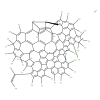

In [ ]:
struc_big = list(pybel.readfile('xyz', '/content/c2000.99992000_1_changed_diff.xyz'))[0] 
struc_big

In [ ]:
print(struc_big)

c1cc2c3[C]4C=Cc5c6[C]4c4c3c3c7c8=C(c9cccc%10c9-c(c1C%10)c27)[C]1C=Cc2c7c(C=[CH])cc9c7c7c%10c%11c%12c%13[C]%14c(c8c%13c%10c12)c3c1c4c2c3c4c8c(cc(c5)c64)ccc8c4c5c6c(C[CH]C=C6)cc6c5c(c34)c3c2c1c1c%14c2c(c4c1c1[C]([CH]4)[CH]c6c31)c1c3cccc4c3c3c(C=[C]c(c%11c7cc9)c3c1c%122)cc4.[H]	/content/c2000.99992000_1_changed_diff.xyz



In [ ]:
strucs = [pybel.readstring('xyz', x) for x in df_new['xyz']]

In [137]:
!pip install megnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 7.8 MB/s eta 0:00:00


In [138]:
from megnet.data.molecule import MolecularGraph
from megnet.data.graph import GaussianDistance
from megnet.callbacks import ModelCheckpointMAE, EarlyStopping
from megnet.models import MEGNetModel
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#del model

In [139]:
model = MEGNetModel(nfeat_edge=27, nfeat_global=2, nfeat_node=27, nblocks=1, lr=1e-2,
                    n1=4, n2=4, n3=4, npass=1, ntarget=1, batch_size=64, loss='mae', metrics=["mean_absolute_error"],
                    graph_converter=MolecularGraph(
atom_features= [
    "element",
    "chirality",
    "formal_charge",
    "ring_sizes",
    "hybridization",
    "donor",
    "acceptor",
    "aromatic",
], 
bond_features=["bond_type", "same_ring", "spatial_distance", "graph_distance"],
known_elements=["H", "C", "N", "O", "F"],
distance_converter=GaussianDistance(np.linspace(0, 4, 20), 0.5)))

In [140]:
model.load_weights('/content/drive/MyDrive/QM9/QM9_CHAMPS/checkpoints/qm9_checkpoint_00046')

In [ ]:
print(structures[200])

[CH]([CH2])C=C=C	



In [ ]:
len(structures)

0

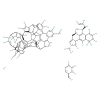

In [ ]:
structures[3]

In [ ]:
del xyz_strings[444]

In [ ]:
structures = [pybel.readstring('xyz', x) for x in xyz_strings]

In [141]:
preds = []
fups =[]
ns = []
n = 0
incr = 0
for struct in structures:
  print(f'structure {n} is being processed')
  try:
    pred = model.predict_structure(struct)
    preds.append(pred)
    if np.isnan(pred)[0]:
      ns.append(n)
    n += 1
  except:
    print('F-up structure')
    fups.append(n)
    #incr += 1
    n += 1
    continue
  

structure 0 is being processed
structure 1 is being processed
structure 2 is being processed
structure 3 is being processed


[14:51:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 7 8 10 11 12 13 16 17 18 19 20 21 22 23 25 29 30 31 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 90 91 92 93 94 95 96 97 98 99 102 103 104 105 106 107 108 109 110 111
[14:51:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 7 8 10 11 12 13 16 17 18 19 20 21 22 23 25 29 30 31 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 90 91 92 93 94 95 96 97 98 99 102 103 104 105 106 107 108 109 110 111
[14:51:54] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 7 8 10 11 12 13 16 17 18 19 20 21 22 23 25 29 30 31 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 90 91 92 93 94 95 96 97 98 99 102 103 104 105 106 107 108 109 110 111
[14:51:54] Can't kekulize

structure 4 is being processed
structure 5 is being processed
structure 6 is being processed
structure 7 is being processed
structure 8 is being processed
structure 9 is being processed
structure 10 is being processed
structure 11 is being processed
structure 12 is being processed
structure 13 is being processed
structure 14 is being processed
structure 15 is being processed
structure 16 is being processed
structure 17 is being processed
structure 18 is being processed
structure 19 is being processed
structure 20 is being processed
structure 21 is being processed
structure 22 is being processed
structure 23 is being processed
structure 24 is being processed
structure 25 is being processed
structure 26 is being processed
structure 27 is being processed
structure 28 is being processed
structure 29 is being processed
structure 30 is being processed


[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not removing hydrogen atom without neighbors
[14:51:57] WARNING: not r

structure 31 is being processed
structure 32 is being processed
structure 33 is being processed
structure 34 is being processed
structure 35 is being processed
structure 36 is being processed
structure 37 is being processed
structure 38 is being processed
structure 39 is being processed
structure 40 is being processed
structure 41 is being processed
structure 42 is being processed
structure 43 is being processed
structure 44 is being processed
structure 45 is being processed
structure 46 is being processed
structure 47 is being processed
structure 48 is being processed
structure 49 is being processed
structure 50 is being processed
structure 51 is being processed
structure 52 is being processed
structure 53 is being processed
structure 54 is being processed
structure 55 is being processed
structure 56 is being processed


[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not removing hydrogen atom without neighbors
[14:52:00] WARNING: not r

structure 57 is being processed
structure 58 is being processed
structure 59 is being processed
structure 60 is being processed
structure 61 is being processed
structure 62 is being processed
structure 63 is being processed
structure 64 is being processed
structure 65 is being processed
structure 66 is being processed
structure 67 is being processed
structure 68 is being processed
structure 69 is being processed
structure 70 is being processed
structure 71 is being processed
structure 72 is being processed
structure 73 is being processed
structure 74 is being processed
structure 75 is being processed
structure 76 is being processed
structure 77 is being processed
structure 78 is being processed
structure 79 is being processed
structure 80 is being processed
structure 81 is being processed
structure 82 is being processed
structure 83 is being processed
structure 84 is being processed
structure 85 is being processed
structure 86 is being processed
structure 87 is being processed
structur

[14:52:06] WARNING: not removing hydrogen atom without neighbors
[14:52:06] WARNING: not removing hydrogen atom without neighbors
[14:52:06] WARNING: not removing hydrogen atom without neighbors
[14:52:06] WARNING: not removing hydrogen atom without neighbors


structure 107 is being processed
structure 108 is being processed
structure 109 is being processed
structure 110 is being processed
structure 111 is being processed
structure 112 is being processed
structure 113 is being processed
structure 114 is being processed
structure 115 is being processed
structure 116 is being processed
structure 117 is being processed
structure 118 is being processed
structure 119 is being processed
structure 120 is being processed
structure 121 is being processed
structure 122 is being processed
structure 123 is being processed
structure 124 is being processed


[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not removing hydrogen atom without neighbors
[14:52:07] WARNING: not r

structure 125 is being processed
structure 126 is being processed
structure 127 is being processed
structure 128 is being processed
structure 129 is being processed
structure 130 is being processed
structure 131 is being processed
structure 132 is being processed
structure 133 is being processed
structure 134 is being processed
structure 135 is being processed
structure 136 is being processed
structure 137 is being processed
structure 138 is being processed
structure 139 is being processed
structure 140 is being processed
structure 141 is being processed
structure 142 is being processed
structure 143 is being processed
structure 144 is being processed
structure 145 is being processed
structure 146 is being processed
structure 147 is being processed
structure 148 is being processed
structure 149 is being processed
structure 150 is being processed
structure 151 is being processed
structure 152 is being processed
structure 153 is being processed
structure 154 is being processed
structure 

[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors
[14:52:11] WARNING: not removing hydrogen atom without neighbors


structure 183 is being processed
structure 184 is being processed
structure 185 is being processed
structure 186 is being processed
structure 187 is being processed
structure 188 is being processed
structure 189 is being processed
structure 190 is being processed
structure 191 is being processed
structure 192 is being processed
structure 193 is being processed
structure 194 is being processed
structure 195 is being processed
structure 196 is being processed
structure 197 is being processed
structure 198 is being processed
structure 199 is being processed
structure 200 is being processed
structure 201 is being processed
structure 202 is being processed
structure 203 is being processed
structure 204 is being processed
structure 205 is being processed
structure 206 is being processed
structure 207 is being processed
structure 208 is being processed
structure 209 is being processed
structure 210 is being processed
structure 211 is being processed
structure 212 is being processed
structure 

[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not removing hydrogen atom without neighbors
[14:52:17] WARNING: not r

structure 223 is being processed
structure 224 is being processed
structure 225 is being processed
structure 226 is being processed
structure 227 is being processed
structure 228 is being processed
structure 229 is being processed
structure 230 is being processed
structure 231 is being processed
structure 232 is being processed
structure 233 is being processed
structure 234 is being processed
structure 235 is being processed
structure 236 is being processed
structure 237 is being processed
structure 238 is being processed
structure 239 is being processed
structure 240 is being processed
structure 241 is being processed
structure 242 is being processed
structure 243 is being processed
structure 244 is being processed
structure 245 is being processed
F-up structure
structure 246 is being processed
structure 247 is being processed
structure 248 is being processed


[14:52:19] WARNING: not removing hydrogen atom without neighbors
[14:52:19] WARNING: not removing hydrogen atom without neighbors
[14:52:19] WARNING: not removing hydrogen atom without neighbors
[14:52:19] WARNING: not removing hydrogen atom without neighbors


structure 249 is being processed
structure 250 is being processed
structure 251 is being processed
structure 252 is being processed
structure 253 is being processed
structure 254 is being processed
structure 255 is being processed
structure 256 is being processed
structure 257 is being processed
structure 258 is being processed
structure 259 is being processed
structure 260 is being processed
structure 261 is being processed
structure 262 is being processed
structure 263 is being processed
structure 264 is being processed
structure 265 is being processed
structure 266 is being processed
structure 267 is being processed
structure 268 is being processed
structure 269 is being processed
structure 270 is being processed
structure 271 is being processed
structure 272 is being processed
structure 273 is being processed
structure 274 is being processed
structure 275 is being processed
structure 276 is being processed
structure 277 is being processed
structure 278 is being processed
structure 

[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not removing hydrogen atom without neighbors
[14:52:26] WARNING: not r

structure 315 is being processed
structure 316 is being processed
structure 317 is being processed
structure 318 is being processed
structure 319 is being processed
structure 320 is being processed
structure 321 is being processed
structure 322 is being processed
structure 323 is being processed
structure 324 is being processed
structure 325 is being processed
structure 326 is being processed
structure 327 is being processed
structure 328 is being processed
structure 329 is being processed
structure 330 is being processed
structure 331 is being processed
structure 332 is being processed
structure 333 is being processed
structure 334 is being processed
structure 335 is being processed
structure 336 is being processed
structure 337 is being processed
structure 338 is being processed
structure 339 is being processed
structure 340 is being processed
structure 341 is being processed
structure 342 is being processed
structure 343 is being processed
structure 344 is being processed
structure 

[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors
[14:52:29] WARNING: not removing hydrogen atom without neighbors


structure 352 is being processed
structure 353 is being processed
structure 354 is being processed
structure 355 is being processed
structure 356 is being processed
structure 357 is being processed
F-up structure
structure 358 is being processed
structure 359 is being processed


[14:52:30] WARNING: not removing hydrogen atom without neighbors
[14:52:30] WARNING: not removing hydrogen atom without neighbors
[14:52:30] WARNING: not removing hydrogen atom without neighbors
[14:52:30] WARNING: not removing hydrogen atom without neighbors


structure 360 is being processed
structure 361 is being processed
structure 362 is being processed
structure 363 is being processed
structure 364 is being processed
structure 365 is being processed
structure 366 is being processed
structure 367 is being processed
structure 368 is being processed
structure 369 is being processed
structure 370 is being processed
structure 371 is being processed
structure 372 is being processed
F-up structure
structure 373 is being processed
structure 374 is being processed
structure 375 is being processed


[14:52:31] WARNING: not removing hydrogen atom without neighbors
[14:52:31] WARNING: not removing hydrogen atom without neighbors
[14:52:31] WARNING: not removing hydrogen atom without neighbors
[14:52:31] WARNING: not removing hydrogen atom without neighbors


structure 376 is being processed
structure 377 is being processed
structure 378 is being processed
structure 379 is being processed
structure 380 is being processed
structure 381 is being processed
structure 382 is being processed


[14:52:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 8 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 42 43 46 47 48 49 50 51 52 53 54 55 56 68 69 70 71 74 75 76 77 78 79 80 81 82 83 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 105 106 107 108 109
[14:52:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 8 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 42 43 46 47 48 49 50 51 52 53 54 55 56 68 69 70 71 74 75 76 77 78 79 80 81 82 83 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 105 106 107 108 109
[14:52:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 8 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 42 43 46 47 48 49 50 51 52 53 54 55 56 68 69 70 71 74 75 76 77 78 79 80 81 82 83 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 105 106 107 108 109
[14:52:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 8 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 42 43 46 47

structure 383 is being processed
structure 384 is being processed
structure 385 is being processed
structure 386 is being processed
structure 387 is being processed
structure 388 is being processed
structure 389 is being processed
structure 390 is being processed
structure 391 is being processed
structure 392 is being processed
structure 393 is being processed
structure 394 is being processed
structure 395 is being processed
structure 396 is being processed
structure 397 is being processed
structure 398 is being processed
structure 399 is being processed
structure 400 is being processed
structure 401 is being processed
structure 402 is being processed
structure 403 is being processed
structure 404 is being processed
structure 405 is being processed
structure 406 is being processed
F-up structure
structure 407 is being processed
structure 408 is being processed


[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors
[14:52:35] WARNING: not removing hydrogen atom without neighbors


structure 409 is being processed
structure 410 is being processed
structure 411 is being processed
structure 412 is being processed
structure 413 is being processed
structure 414 is being processed
structure 415 is being processed
structure 416 is being processed
structure 417 is being processed
structure 418 is being processed
structure 419 is being processed
structure 420 is being processed
structure 421 is being processed
structure 422 is being processed
structure 423 is being processed
structure 424 is being processed
structure 425 is being processed
structure 426 is being processed
structure 427 is being processed
structure 428 is being processed
structure 429 is being processed
structure 430 is being processed
structure 431 is being processed
structure 432 is being processed
structure 433 is being processed
structure 434 is being processed
structure 435 is being processed
structure 436 is being processed
structure 437 is being processed
structure 438 is being processed
F-up struc

[14:52:38] WARNING: not removing hydrogen atom without neighbors
[14:52:38] WARNING: not removing hydrogen atom without neighbors
[14:52:38] WARNING: not removing hydrogen atom without neighbors
[14:52:38] WARNING: not removing hydrogen atom without neighbors


structure 442 is being processed
structure 443 is being processed
structure 444 is being processed
structure 445 is being processed
structure 446 is being processed
structure 447 is being processed
structure 448 is being processed
structure 449 is being processed
structure 450 is being processed
structure 451 is being processed
structure 452 is being processed
structure 453 is being processed
structure 454 is being processed
F-up structure
structure 455 is being processed
structure 456 is being processed


[14:52:39] WARNING: not removing hydrogen atom without neighbors
[14:52:39] WARNING: not removing hydrogen atom without neighbors
[14:52:39] WARNING: not removing hydrogen atom without neighbors
[14:52:39] WARNING: not removing hydrogen atom without neighbors


structure 457 is being processed
structure 458 is being processed
structure 459 is being processed
structure 460 is being processed
structure 461 is being processed
structure 462 is being processed
structure 463 is being processed
structure 464 is being processed
structure 465 is being processed
structure 466 is being processed
structure 467 is being processed
structure 468 is being processed


In [142]:
fups

[105, 179, 180, 220, 245, 286, 348, 349, 357, 372, 406, 438, 454]

In [ ]:
fups

[105, 179, 180, 245, 286, 348, 349, 357, 372, 438, 454]

In [143]:
preds

[array([nan], dtype=float32),
 array([-13.096429], dtype=float32),
 array([-3.2934005], dtype=float32),
 array([-29.084059], dtype=float32),
 array([-8.402275], dtype=float32),
 array([-3.2909412], dtype=float32),
 array([-13.164717], dtype=float32),
 array([-3.2951188], dtype=float32),
 array([-3.290206], dtype=float32),
 array([-3.291492], dtype=float32),
 array([-3.290856], dtype=float32),
 array([-15.630665], dtype=float32),
 array([-19.500734], dtype=float32),
 array([-3.293954], dtype=float32),
 array([-3.290659], dtype=float32),
 array([-26.627583], dtype=float32),
 array([-15.5252075], dtype=float32),
 array([-8.379098], dtype=float32),
 array([-17.624765], dtype=float32),
 array([-13.094405], dtype=float32),
 array([-3.305695], dtype=float32),
 array([nan], dtype=float32),
 array([-19.307478], dtype=float32),
 array([-3.2920413], dtype=float32),
 array([-20.577568], dtype=float32),
 array([-3.2904553], dtype=float32),
 array([-3.2922587], dtype=float32),
 array([-3.2900815], d

In [ ]:
df_fin = df_fin.reset_index()

In [ ]:
structures[57]

ParseError: ignored

In [ ]:
preds = [model.predict_structure(struct) for struct in structures]

[16:40:24] WARNING: not removing hydrogen atom without neighbors
[16:40:24] WARNING: not removing hydrogen atom without neighbors


ValueError: ignored

In [ ]:
preds

[array([-19.517391], dtype=float32),
 array([-19.504509], dtype=float32),
 array([-19.33009], dtype=float32),
 array([-3.3052692], dtype=float32),
 array([-19.307886], dtype=float32),
 array([-19.524418], dtype=float32),
 array([-19.338041], dtype=float32),
 array([-19.327436], dtype=float32),
 array([-15.56102], dtype=float32),
 array([-19.507925], dtype=float32),
 array([-3.2902503], dtype=float32),
 array([-25.631699], dtype=float32),
 array([-19.304096], dtype=float32),
 array([-21.399021], dtype=float32),
 array([-19.307138], dtype=float32),
 array([-19.30279], dtype=float32),
 array([-19.304485], dtype=float32),
 array([-19.314651], dtype=float32),
 array([-3.2903895], dtype=float32),
 array([-19.511896], dtype=float32),
 array([-19.30268], dtype=float32),
 array([-19.513063], dtype=float32),
 array([-19.2894], dtype=float32),
 array([-16.724525], dtype=float32),
 array([-21.031609], dtype=float32),
 array([-19.33396], dtype=float32),
 array([-19.336199], dtype=float32),
 array([

In [ ]:
len(preds)

117

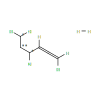

In [ ]:
struc = list(pybel.readfile('xyz', '/content/c2000.99992000.pos_9.xyz'))
struc[0]

In [ ]:
len(preds)

458

In [147]:
ns

[0, 21, 30, 38, 56, 73, 122, 140, 265, 290, 314, 396, 408, 409, 440, 455, 458]

In [144]:
ns_files_list = []
for n in ns:
  ns_files_list.append(df_fin.loc[df_fin['index'] == n, 'file_names'].iloc[0])

In [145]:
ns_files_list

['/content/drive/MyDrive/acetylene/xyz/c2000.99992000_9.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99992000_147.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99992000_45.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99992000_131.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99992000_66.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99992000_14.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99994000_45.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99994000_13.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99996000_13.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99998000_10.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99998000_45.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99990000_147.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99990000_191.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99990000_45.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.99990000_66.xyz',
 '/content/drive/MyDrive/acetylene/xyz/c2000.9999000

In [148]:
fups_files_list = []
for n in fups:
  fups_files_list.append(df_fin.loc[df_fin['index'] == n, 'file_names'].iloc[0])

In [149]:
df_fin_cleared = df_fin.copy()

In [150]:
df_fin_cleared = df_fin_cleared[~df_fin_cleared['file_names'].isin(ns_files_list)]
df_fin_cleared

,index,cluster,xyz,file_names
1,1,359,6\n\nH 37.4239 29.2873 32.0733\nH 37.7208 29.5...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
2,2,560,2\n\nH 42.7273 27.8157 31.7577\nH 42.4459 28.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
3,3,1,147\n\nH 52.1782 30.9589 72.1766\nC 52.2687 31...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
4,4,56,5\n\nH 34.8405 36.0883 26.9255\nH 33.4974 34.7...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
5,5,264,2\n\nH 30.4006 42.2811 30.663\nH 31.0634 42.86...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
...,...,...,...,...
464,464,623,2\n\nH 60.2071 61.2089 55.2853\nH 59.3886 61.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
465,465,176,5\n\nH 58.1595 66.4976 50.6964\nH 59.1228 68.3...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
466,466,211,2\n\nH 57.1123 64.0547 57.4129\nH 56.8264 63.6...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
467,467,120,11\n\nH 56.087 50.8942 64.8565\nC 55.8253 52.0...,/content/drive/MyDrive/acetylene/xyz/c2000.999...


In [151]:
df_fin_cleared = df_fin_cleared[~df_fin_cleared['file_names'].isin(fups_files_list)]
df_fin_cleared

,index,cluster,xyz,file_names
1,1,359,6\n\nH 37.4239 29.2873 32.0733\nH 37.7208 29.5...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
2,2,560,2\n\nH 42.7273 27.8157 31.7577\nH 42.4459 28.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
3,3,1,147\n\nH 52.1782 30.9589 72.1766\nC 52.2687 31...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
4,4,56,5\n\nH 34.8405 36.0883 26.9255\nH 33.4974 34.7...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
5,5,264,2\n\nH 30.4006 42.2811 30.663\nH 31.0634 42.86...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
...,...,...,...,...
464,464,623,2\n\nH 60.2071 61.2089 55.2853\nH 59.3886 61.4...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
465,465,176,5\n\nH 58.1595 66.4976 50.6964\nH 59.1228 68.3...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
466,466,211,2\n\nH 57.1123 64.0547 57.4129\nH 56.8264 63.6...,/content/drive/MyDrive/acetylene/xyz/c2000.999...
467,467,120,11\n\nH 56.087 50.8942 64.8565\nC 55.8253 52.0...,/content/drive/MyDrive/acetylene/xyz/c2000.999...


In [152]:
df_fin_cleared.to_csv('/content/drive/MyDrive/acetylene/pos/fin_df_cleared.csv')

In [ ]:
ns_structures = [list(pybel.readfile('xyz', m))[0] for m in ns_files_list]

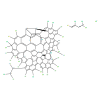

In [ ]:
ns_structures[1]

In [ ]:
smi_list = [mol.write("smi") for mol in ns_structures]

In [ ]:
smi_list

['[C]([CH2])[CH]C=C=C.[H][H]\t/content/drive/MyDrive/acetylene/xyz/c2000.99992000_9.xyz\n',
 'c1cc2c3[C]4C=Cc5c6[C]4c4c3c3c7c8=C(c9cccc%10c9-c(c1C%10)c27)[C]1C=Cc2c7c([CH][CH2])cc9c7c7c%10c%11c%12c%13[C]%14c(c8-c%13c%10c12)c3c1c4c2c3c4c8c(cc(c5)c64)ccc8c4c5[C][C]=Cc6c5c(c34)c3c2c1c1=C%14[C]2C(=c4c5cccc8c5c5c(C=[C]c(c%11c7cc9)c5c4c%122)cc8)C2=c1c1[C]([CH]2)[CH]c6c31.[H].[CH]=C[C][CH2]\t/content/drive/MyDrive/acetylene/xyz/c2000.99992000_1.xyz\n',
 '[CH3].C=C=C[CH][CH2]\t/content/drive/MyDrive/acetylene/xyz/c2000.99992000_147.xyz\n',
 'C.[H][H]\t/content/drive/MyDrive/acetylene/xyz/c2000.99992000_131.xyz\n',
 'C1=CC2=C([CH]1)c1ccc3cc4c5c3c1c([C]2)c1c5c(=C[CH]4)cc1.[H]\t/content/drive/MyDrive/acetylene/xyz/c2000.99992000_66.xyz\n',
 'C1=CC(=C[CH]1)C1=C([CH][CH2])[CH]C=C1.[H][H]\t/content/drive/MyDrive/acetylene/xyz/c2000.99992000_14.xyz\n',
 '[CH]1[CH]c2c3-c4c5-c6c3c3c7c2[C]2c8c(cccc8-c8c9[CH][CH]C%10=c9c9c%11-c(c%12c3c3[C]%13c%14c(-c63)c3c6[C]%15c5c(C=C%15[CH]c5c6c(cc5)c5c6=C([C]=Cc%15c6

In [ ]:
ns

[0,
 3,
 21,
 38,
 56,
 73,
 95,
 140,
 189,
 265,
 290,
 382,
 396,
 408,
 409,
 415,
 440,
 455,
 458]

In [ ]:
ns

[0,
 3,
 21,
 38,
 56,
 73,
 95,
 140,
 189,
 265,
 290,
 382,
 396,
 408,
 409,
 415,
 440,
 455,
 458]

In [ ]:
nans = np.argwhere(np.isnan(preds))
nans

array([[  0,   0],
       [  3,   0],
       [ 21,   0],
       [ 38,   0],
       [ 56,   0],
       [ 73,   0],
       [ 95,   0],
       [139,   0],
       [186,   0],
       [261,   0],
       [285,   0],
       [373,   0],
       [387,   0],
       [399,   0],
       [400,   0],
       [406,   0],
       [430,   0],
       [444,   0],
       [447,   0]])

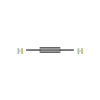

In [ ]:
strucs[90]

In [ ]:
print(strucs[90])

C#C	



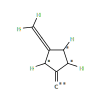

In [ ]:
struc_31 = list(pybel.readfile('xyz', '/content/31_137.xyz'))
struc_31[0]

In [ ]:
print(struc_31[0])

[C]=C1[CH]C(=C=C)[CH][CH]1	/content/31_137.xyz



In [ ]:
x_coords = df.loc[df['cluster'] == 338, 'x'].to_list()
x_coords = [(i, j) for i, j in zip(range(len(x_coords)), x_coords)]

In [ ]:
x_coords.sort(key=lambda x: x[1])
x_coords

[(0, 8.55988), (3, 9.4529), (2, 10.366), (1, 11.4659)]

In [ ]:
diff_lo = x_coords[0][1] - x_coords[1][1]
diff_hi = x_coords[-1][1] - x_coords[-2][1]
if abs(diff_lo) > 4:
  df['x'].replace(x_coords[0][1], x_coords[0][1]+(xhi-xlo))
elif abs(diff_hi) > 4:
  df['x'].replace(x_coords[-1][1], x_coords[-1][1]+(xhi-xlo))

In [ ]:
z_coords = df.loc[df['cluster'] == 338, 'z'].to_list()
z_coords = [(i, j) for i, j in zip(range(len(z_coords)), z_coords)]

In [ ]:
z_coords.sort(key=lambda x: x[1])
type(z_coords[0][1])

float

In [ ]:
diff_lo = z_coords[0][1] - z_coords[1][1]
print(z_coords[0][1])
print(z_coords[1][1])
diff_hi = z_coords[-1][1] - z_coords[-2][1]
if abs(diff_lo) > 4:
  print(abs(diff_lo))
  df = df.replace(z_coords[0][1], z_coords[0][1]+(zhi-zlo))
  print(type(df))
elif abs(diff_hi) > 4:
  df = df.replace(z_coords[-1][1], z_coords[-1][1]+(zhi-zlo))

-54.502
148.839
203.341
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

,id,type,x,y,z,cluster
0,129,C,31.20140,-52.6861,-51.1223,129
1,176,H,29.97810,-51.5257,-52.5532,129
2,130,C,30.56420,-52.1062,-51.8010,129
3,376,H,31.57940,-53.2153,-50.3500,129
4,340,H,8.55988,24.1268,150.1945,338


In [ ]:
type(x_coords[0])

float

In [ ]:
print(x_coords)

None


In [ ]:
def find_outlier(coords: list[float], lo_hi:list[float]) -> int:

In [ ]:
for cluster in clusters:
  df_xyz = df.loc[[df['cluster'] == cluster]]
  df_xyz

In [ ]:
struc = []
with open(file, 'r') as fp:
  data = fp.read().rstrip()
  print(data)

4

C 31.2014 -52.6861 -51.1223
H 29.9781 -51.5257 -52.5532
C 30.5642 -52.1062 -51.801
H 31.5794 -53.2153 -50.35


In [ ]:
struc = [list(pybel.readfile(format='xyz', filename=file))[0]]

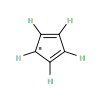

In [ ]:
struc[0]

In [ ]:
print(struc[0])

C1=CC=C[CH]1	/content/test_mol_big.xyz



In [ ]:
!pip install MDAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.3/521.3 kB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, GRO, TRR

In [ ]:
u = mda.Universe('/content/99992000_1_initial.xyz', guess_bonds=True)

In [ ]:
u = mda.Universe('/content/acetylene_box.data', format='LAMMPS', atom_style=' id type charge x y z')
print(u)

ValueError: ignored

In [ ]:
u.atoms

<AtomGroup with 147 atoms>

In [ ]:
from MDAnalysis import transformations

In [ ]:
from MDAnalysis.transformations.wrap import unwrap
u = mda.Universe('/content/99992000_1_initial.xyz', guess_bonds=True)

In [ ]:
ag = u.atoms

In [ ]:
ag

<AtomGroup with 147 atoms>

In [ ]:
ag.dimensions = [2.6405757999999999e+01, 2.5567896999999995e+01, 2.5701368999999993e+01,
                 7.0495258000000007e+01, 6.9657397000000003e+01, 6.9790868999999986e+01]

In [ ]:
ag.dimensions = [-5.3897742000000008e+01, -5.4735603000000012e+01, -5.4602131000000014e+01, 
                          1.5079875800000002e+02, 1.4996089699999999e+02, 1.5009436900000000e+02]

In [ ]:
ag.dimensions

array([26.405758, 25.567898, 25.701368, 70.495255, 69.657394, 69.79087 ],
      dtype=float32)

In [ ]:
np.savetxt('out.xyz', ag.unwrap(), fmt='%1.11f')

In [ ]:
transform = unwrap(ag)

In [ ]:
u.trajectory.add_transformations(transform)

In [ ]:
with MDAnalysis.Writer('/content/99992000_1.xyz') as W:
  for ts in u.trajectory:
    

In [ ]:
u = mda.Universe('/content/99992000_1_initial.xyz', guess_bonds=True)

In [ ]:
ag = u.atoms
ag.dimensions = [2.6405757999999999e+01, 7.0495258000000007e+01,
2.5567896999999995e+01, 6.9657397000000003e+01,
2.5701368999999993e+01, 6.9790868999999986e+01]
transform = transformations.unwrap(ag)
u.trajectory.add_transformations(transform)

In [ ]:
u.trajectory.Writer('/content/99992000_1_tran.xyz')

< XYZWriter '/content/99992000_1_tran.xyz' for 147 atoms >

In [ ]:
types = []
with open('/content/99992000_1_initial.xyz', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    types.append(line[0])
fin.close()
types

In [ ]:
coords = []
with open('/content/out.xyz', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    coords.append(line)
fin.close()
coords

In [ ]:
lines = []
for i in range(len(coords)):
  lines.append(types[i]+' '+coords[i])

In [ ]:
with open('/content/99992000_1.xyz', 'w') as fin:
  fin.writelines(lines)
fin.close()

In [ ]:
struc = [list(pybel.readfile(format='xyz', filename='/content/99992000_1.xyz'))][0]

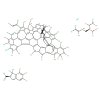

In [ ]:
struc[0]

In [ ]:
print(struc[0])

[CH]([C])[C]1CC2=C([C]=CC=C2)[C]1.c12c(c3c4c5c6c7c8c9c(C=C[C]%10[C]9c9c%11C%10=[C][C]=c%10c(c%12c%13c(c%11%10)c%10c9c9c7c4c4c3c(c2)c2c3c4c9c%10c4c7[C]%13c9c%12c([C])c%10c%11c9c9c7c(c7c4c3[C]([CH]7)[CH]2)c2c3cccc4c3c3c(C=[C]c(c%11c(c%10[C])C=[CH])c3c92)cc4)[C])cc8cc6cc5)C=C[CH]C1.[H].[CH]([C]([C][C]/C=C\[C])[CH][C])[CH2]	/content/99992000_1.xyz



In [ ]:
hkeywords = ["atoms","ellipsoids","lines","triangles","bodies",
             "bonds","angles","dihedrals","impropers",
	     "atom types","bond types","angle types","dihedral types",
	     "improper types","xlo xhi","ylo yhi","zlo zhi","xy xz yz"]

skeywords = [["Masses","atom types"],
             ["Atoms","atoms"],["Ellipsoids","ellipsoids"],
             ["Lines","lines"],["Triangles","triangles"],["Bodies","bodies"],
             ["Bonds","bonds"],
	     ["Angles","angles"],["Dihedrals","dihedrals"],
	     ["Impropers","impropers"],["Velocities","atoms"],
             ["Pair Coeffs","atom types"],
	     ["Bond Coeffs","bond types"],["Angle Coeffs","angle types"],
	     ["Dihedral Coeffs","dihedral types"],
	     ["Improper Coeffs","improper types"],
             ["BondBond Coeffs","angle types"],
             ["BondAngle Coeffs","angle types"],
             ["MiddleBondTorsion Coeffs","dihedral types"],
             ["EndBondTorsion Coeffs","dihedral types"],
             ["AngleTorsion Coeffs","dihedral types"],
             ["AngleAngleTorsion Coeffs","dihedral types"],
             ["BondBond13 Coeffs","dihedral types"],
             ["AngleAngle Coeffs","improper types"],
             ["Molecules","atoms"]]

In [ ]:
file = '/content/c2000.970000000.pos'
f = open(file)

title = f.readline()
names = {}
    
headers = {}
while 1:
      line = f.readline()
      line = line.strip()
      if len(line) == 0:
        continue
      found = 0
      for keyword in hkeywords:
        if line.find(keyword) >= 0:
	         found = 1
	         words = line.split()
	         if keyword == "xlo xhi" or keyword == "ylo yhi" or \
	            keyword == "zlo zhi":
	            headers[keyword] = (float(words[0]),float(words[1]))
	         elif keyword == "xy xz yz":
	            headers[keyword] = \
              (float(words[0]),float(words[1]),float(words[2]))
           else:
	             headers[keyword] = int(words[0])
        if not found:
          break

    sections = {}
    while 1:
      found = 0
      for pair in skeywords:
        keyword,length = pair[0],pair[1]
        if keyword == line:
	  found = 1
          if not headers.has_key(length):
            raise StandardError, \
                  "data section %s has no matching header value" % line
	  f.readline()
          list = []
          for i in xrange(headers[length]): list.append(f.readline())
          sections[keyword] = list
      if not found:
        raise StandardError,"invalid section %s in data file" % line
      f.readline()
      line = f.readline()
      if not line:
        break
      line = line.strip()
      
    f.close()
    self.headers = headers
    self.sections = sections